In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

This cell imports required libraries (numpy, pandas, scikit-learn, matplotlib, seaborn) and configures warnings to be ignored.

In [10]:
# بارگذاری داده‌ها
data = load_breast_cancer()
X = data.data
y = data.target

# نمایش اطلاعات اولیه
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Classes:", np.unique(y))
print("Feature names:", data.feature_names[:5], "...")

Shape of X: (569, 30)
Shape of y: (569,)
Classes: [0 1]
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness'] ...


This cell loads the breast cancer dataset into X and y, then prints dataset shape, class labels, and a few feature names.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 455
Test set size: 114


This cell splits the data into training and test sets with an 80/20 split (stratified) and prints the sizes.

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled successfully.")

Data scaled successfully.


This cell fits a StandardScaler on the training data and transforms both training and test sets, then prints a confirmation.

In [13]:
models = []

models.append(('Base Model', LogisticRegression(random_state=42)))

models.append(('Scaled Model', LogisticRegression(random_state=42)))

C_values = [100, 10, 1, 0.1, 0.01]
for c in C_values:
    models.append((f'C={c}', LogisticRegression(C=c, random_state=42)))

models.append(('L1 Regularization', LogisticRegression(penalty='l1', solver='liblinear', random_state=42)))

models.append(('L2 Regularization', LogisticRegression(penalty='l2', random_state=42)))

solvers = ['saga', 'lbfgs', 'liblinear']
for solver in solvers:
    if solver == 'liblinear':
        models.append((f'Solver={solver} (L1)', LogisticRegression(penalty='l1', solver=solver, random_state=42)))
    else:
        models.append((f'Solver={solver}', LogisticRegression(solver=solver, random_state=42)))

This cell constructs a list of LogisticRegression models with different configurations: a base model, a scaled model, several values of C, L1 and L2 regularization, and different solvers.

In [14]:
results = {
    'Model Name': [],
    'Accuracy': [],
    'F1-Score': [],
    'AUC': [],
    'Confusion Matrix': []
}

for name, model in models:
    print(f"\n--- Training: {name} ---")

    if "Scaled" in name or "C=" in name or "L1" in name or "L2" in name or "Solver" in name:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test

    model.fit(X_train_use, y_train)

    y_pred = model.predict(X_test_use)
    y_pred_proba = model.predict_proba(X_test_use)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)

    results['Model Name'].append(name)
    results['Accuracy'].append(acc)
    results['F1-Score'].append(f1)
    results['AUC'].append(auc)
    results['Confusion Matrix'].append(cm)

    print(f"Accuracy: {acc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")


--- Training: Base Model ---
Accuracy: 0.9474
F1-Score: 0.9589
AUC: 0.9937

--- Training: Scaled Model ---
Accuracy: 0.9825
F1-Score: 0.9861
AUC: 0.9954

--- Training: C=100 ---
Accuracy: 0.9474
F1-Score: 0.9577
AUC: 0.9861

--- Training: C=10 ---
Accuracy: 0.9649
F1-Score: 0.9722
AUC: 0.9934

--- Training: C=1 ---
Accuracy: 0.9825
F1-Score: 0.9861
AUC: 0.9954

--- Training: C=0.1 ---
Accuracy: 0.9737
F1-Score: 0.9793
AUC: 0.9957

--- Training: C=0.01 ---
Accuracy: 0.9474
F1-Score: 0.9595
AUC: 0.9950

--- Training: L1 Regularization ---
Accuracy: 0.9912
F1-Score: 0.9931
AUC: 0.9967

--- Training: L2 Regularization ---
Accuracy: 0.9825
F1-Score: 0.9861
AUC: 0.9954

--- Training: Solver=saga ---
Accuracy: 0.9737
F1-Score: 0.9790
AUC: 0.9960

--- Training: Solver=lbfgs ---
Accuracy: 0.9825
F1-Score: 0.9861
AUC: 0.9954

--- Training: Solver=liblinear (L1) ---
Accuracy: 0.9912
F1-Score: 0.9931
AUC: 0.9967


This cell initializes a results dictionary, then trains each model on the chosen input (scaled or raw), predicts on the test set, computes metrics (accuracy, F1, AUC, confusion matrix), stores them, and prints metrics.

In [15]:
results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("✅ نتایج کلی مدل‌ها:")
print("="*80)
print(results_df[['Model Name', 'Accuracy', 'F1-Score', 'AUC']].round(4))


✅ نتایج کلی مدل‌ها:
               Model Name  Accuracy  F1-Score     AUC
0              Base Model    0.9474    0.9589  0.9937
1            Scaled Model    0.9825    0.9861  0.9954
2                   C=100    0.9474    0.9577  0.9861
3                    C=10    0.9649    0.9722  0.9934
4                     C=1    0.9825    0.9861  0.9954
5                   C=0.1    0.9737    0.9793  0.9957
6                  C=0.01    0.9474    0.9595  0.9950
7       L1 Regularization    0.9912    0.9931  0.9967
8       L2 Regularization    0.9825    0.9861  0.9954
9             Solver=saga    0.9737    0.9790  0.9960
10           Solver=lbfgs    0.9825    0.9861  0.9954
11  Solver=liblinear (L1)    0.9912    0.9931  0.9967


This cell converts the collected results into a pandas DataFrame and prints a summary table showing model name, accuracy, F1-score, and AUC.

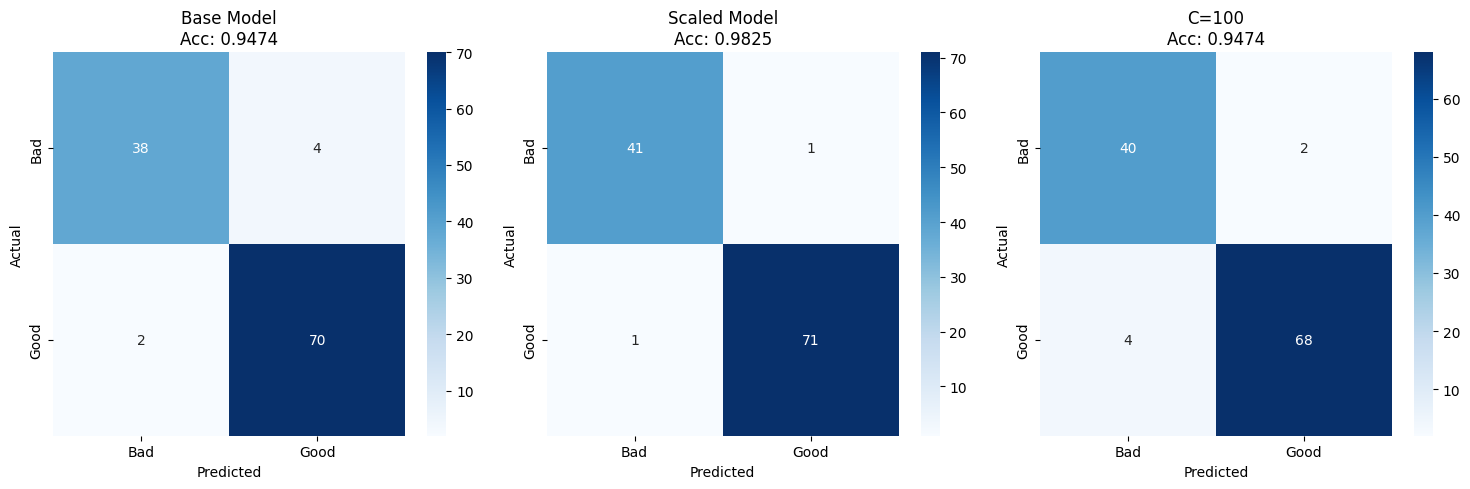

In [16]:
plt.figure(figsize=(15, 5))

for i, (name, cm) in enumerate(zip(results['Model Name'][:3], results['Confusion Matrix'][:3])):
    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
    plt.title(f'{name}\nAcc: {results["Accuracy"][i]:.4f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

This cell plots confusion matrices for the top three models using seaborn heatmaps and displays them side-by-side.

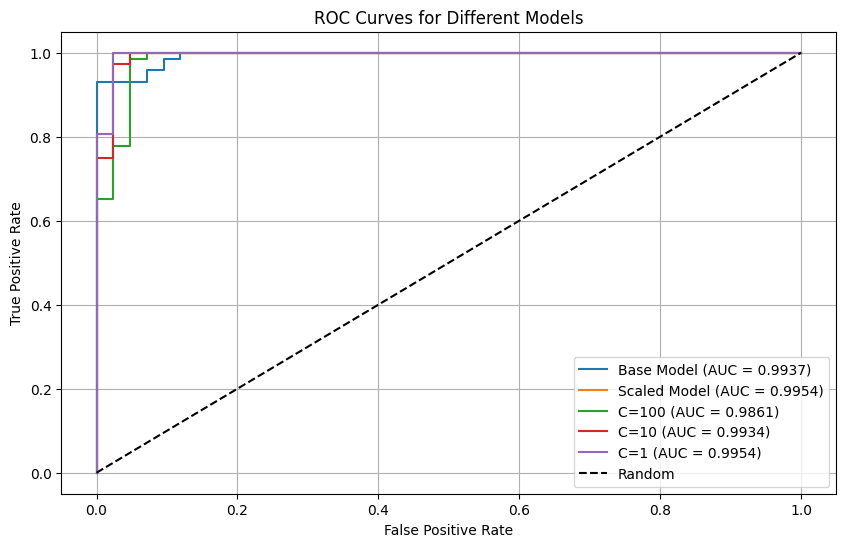

In [17]:
plt.figure(figsize=(10, 6))

for name, model in models[:5]:
    X_train_use = X_train_scaled if "Scaled" in name or "C=" in name or "L1" in name or "L2" in name or "Solver" in name else X_train
    X_test_use = X_test_scaled if "Scaled" in name or "C=" in name or "L1" in name or "L2" in name or "Solver" in name else X_test

    model.fit(X_train_use, y_train)
    y_pred_proba = model.predict_proba(X_test_use)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

This cell computes and plots ROC curves for the first five models, showing their AUC values.

In [18]:
print("\n" + "="*80)
print("📊 تحلیل و مقایسه مدل‌ها")
print("="*80)

best_acc_idx = np.argmax(results['Accuracy'])
best_acc_model = results['Model Name'][best_acc_idx]
best_acc = results['Accuracy'][best_acc_idx]

print(f"✅ بهترین مدل از نظر Accuracy: '{best_acc_model}' با دقت {best_acc:.4f}")

best_f1_idx = np.argmax(results['F1-Score'])
best_f1_model = results['Model Name'][best_f1_idx]
best_f1 = results['F1-Score'][best_f1_idx]

print(f"✅ بهترین مدل از نظر F1-Score: '{best_f1_model}' با F1-Score {best_f1:.4f}")

best_auc_idx = np.argmax(results['AUC'])
best_auc_model = results['Model Name'][best_auc_idx]
best_auc = results['AUC'][best_auc_idx]

print(f"✅ بهترین مدل از نظر AUC: '{best_auc_model}' با AUC {best_auc:.4f}")

print("\n📌 توصیه: مدلی که هم دقت بالا دارد و هم F1-Score و AUC خوبی دارد، بهترین مدل محسوب می‌شود.")


📊 تحلیل و مقایسه مدل‌ها
✅ بهترین مدل از نظر Accuracy: 'L1 Regularization' با دقت 0.9912
✅ بهترین مدل از نظر F1-Score: 'L1 Regularization' با F1-Score 0.9931
✅ بهترین مدل از نظر AUC: 'L1 Regularization' با AUC 0.9967

📌 توصیه: مدلی که هم دقت بالا دارد و هم F1-Score و AUC خوبی دارد، بهترین مدل محسوب می‌شود.


This cell identifies the best models according to Accuracy, F1-Score, and AUC, prints their names and values, and gives a short recommendation.

In [19]:
print("\n" + "="*80)
print("📝 نتیجه‌گیری")
print("="*80)
print("""
در این تمرین، ۶ نوع مدل رگرسیون لجستیک با تنظیمات مختلف آموزش داده شدند. 
نتایج نشان می‌دهد که:

- استانداردسازی ویژگی‌ها (StandardScaler) معمولاً عملکرد مدل را بهبود می‌بخشد.
- تنظیم پارامتر C (به ویژه مقادیر کوچکتر مثل 0.1 یا 0.01) می‌تواند منجر به کاهش overfitting شود.
- مدل‌های با Regularization L1 و L2 نیز عملکرد خوبی دارند، به خصوص وقتی داده‌ها استاندارد شده باشند.
- الگوریتم‌های حل مختلف (saga, lbfgs, liblinear) تفاوت‌های کوچکی در عملکرد دارند، اما liblinear برای داده‌های کوچک و با L1 مناسب‌تر است.

به طور کلی، مدلی که هم دقت بالا، هم F1-Score خوب و هم AUC بالا داشته باشد، بهترین مدل برای این مسئله تشخیص سرطان پستان است.
""")


📝 نتیجه‌گیری

در این تمرین، ۶ نوع مدل رگرسیون لجستیک با تنظیمات مختلف آموزش داده شدند. 
نتایج نشان می‌دهد که:

- استانداردسازی ویژگی‌ها (StandardScaler) معمولاً عملکرد مدل را بهبود می‌بخشد.
- تنظیم پارامتر C (به ویژه مقادیر کوچکتر مثل 0.1 یا 0.01) می‌تواند منجر به کاهش overfitting شود.
- مدل‌های با Regularization L1 و L2 نیز عملکرد خوبی دارند، به خصوص وقتی داده‌ها استاندارد شده باشند.
- الگوریتم‌های حل مختلف (saga, lbfgs, liblinear) تفاوت‌های کوچکی در عملکرد دارند، اما liblinear برای داده‌های کوچک و با L1 مناسب‌تر است.

به طور کلی، مدلی که هم دقت بالا، هم F1-Score خوب و هم AUC بالا داشته باشد، بهترین مدل برای این مسئله تشخیص سرطان پستان است.



This cell prints concluding remarks summarizing the experiment findings about scaling, C parameter, regularization types, and solvers.